In [1]:

import pandas as pd
import numpy as np

import numpy as np


customer_ids = ['C' + str(i) for i in range(1, 21)]




# Define the data
data = {
    'Week': ['Week1']*1000 + ['Week2']*1000,
    'Supplier': np.random.choice(['S1', 'S2', 'S3'], 2000),
    'Material': np.random.choice(['Met1', 'Met2', 'Met3'], 2000),
    'No_of_Material': np.random.randint(50, 500, 2000),
    'Machine': np.random.choice(['Mach1', 'Mach1', 'Mach1', 'Mach2', 'Mach2', 'Mach3'], 2000),
    'No_of_Product': np.random.randint(50, 400, 2000),
    'Product': np.random.choice(['P1', 'P2', 'P3'], 2000),
    'Customer_id': np.random.choice(customer_ids, 2000)
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a function to assign products to customers
def assign_product(customer_id):
    if customer_id in ['C1', 'C2', 'C3', 'C4', 'C5']:
        return 'P1'
    elif customer_id in ['C6', 'C7', 'C8', 'C9', 'C10']:
        return 'P2'
    else:
        return 'P3'

# Apply the function to the 'Customer_id' column to create the 'Product' column
df['Product'] = df['Customer_id'].apply(assign_product)

# For customers C17, C18, C13, C12 and C19, set 'Product' to 'P3' regardless of 'Extra_Delay'
df.loc[df['Customer_id'].isin(['C17', 'C18', 'C13', 'C12', 'C19']), 'Product'] = 'P3'

# Add Product_Target column
df['Product_Target'] = df['Product'].map({'P1': 0.5*500, 'P2': 0.4*500, 'P3': 0.5*500})

# Add Delivery column
df['Delivery'] = np.where(df['No_of_Product'] >= df['Product_Target'], 'Yes', 'No')

# Add Delayed_Delivery column
df['Delayed_Delivery'] = np.where(df['No_of_Product'] < df['Product_Target'], 'Yes', 'No')


df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach3') & (df['Product'] == 'P3'), 'No_of_Product'] *= 0.5
df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach2') & (df['Product'] == 'P2'), 'No_of_Product'] *= 0.2
df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach2') & (df['Product'] == 'P1'), 'No_of_Product'] *= 0.1

# Ensure the number of products produced is not greater than the number of materials
df['No_of_Product'] = df[['No_of_Material', 'No_of_Product']].min(axis=1)

# Add Delivery Delay Limit column
df['Deli_Delay_Limit'] = df['Product'].map({'P1': 1, 'P2': 2, 'P3': 3})

# Add Extra Delay column
df['Extra_Delay'] =  df['Deli_Delay_Limit'] + 8

# Add Customer_id column
#df['Customer_id'] = 'C' + pd.Series((df.index % 20) + 1).astype(str)

# Reduce the number of P3 products by 50% in the second week
#df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach3') & (df['Product'] == 'P3'), 'No_of_Product'] *= 0.5
# Add Customer_Validity column
conditions = [
    (df['Week'] == 'Week1') & (df['Extra_Delay'] >= 10 ),
    (df['Week'] == 'Week2') & (df['Extra_Delay'] > 9),
    (df['Week'] == 'Week1') & (df['Extra_Delay'] <= 11),
    (df['Week'] == 'Week2') & (df['Extra_Delay'] <= 11)
]
choices = ['Not_Existing', 'Not_Existing', 'Existing', 'Existing']
df['Customer_Validity'] = np.select(conditions, choices, default='Not_Existing')

# Print the DataFrame
print(df)


       Week Supplier Material  No_of_Material Machine  No_of_Product Product  \
0     Week1       S3     Met2             314   Mach3          314.0      P2   
1     Week1       S2     Met3             239   Mach2          239.0      P3   
2     Week1       S3     Met1             392   Mach2           64.0      P3   
3     Week1       S2     Met1             206   Mach2           92.0      P3   
4     Week1       S1     Met1             467   Mach2          331.0      P1   
...     ...      ...      ...             ...     ...            ...     ...   
1995  Week2       S2     Met2             444   Mach1           86.0      P2   
1996  Week2       S3     Met1             283   Mach1          160.0      P1   
1997  Week2       S2     Met1             301   Mach1          272.0      P3   
1998  Week2       S3     Met3             317   Mach1          302.0      P2   
1999  Week2       S3     Met3             414   Mach1          196.0      P2   

     Customer_id  Product_Target Delive

C:\Users\CB.EN.U4CSE20614\AppData\Local\Temp\ipykernel_8052\3773495673.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 95.5 100.5 192.  153.5  96.5 108.5  51.5 152.   80.5  30.   38.   30.
  42.5 117.5 169.  130.5 104.5  89.  187.5 167.  191.   91.   77.   27.5
  56.5  91.5  36.   73.5 186.  104.5 185.5  50.   71.   40.5  97.  168.5
 156.   48.5  32.  184.  171.5  66.   71.  117.   89.   72.   73.   45.5
  61.5  74.5 100.   97.  195.  102.5  32.   25.   65.5  87.   76.   42.5
  49.   25.  154.   74.5  74.5 190.5 154.  120.   92.5  64.5 178.5 154.5
 164.5  82.5  98.5  37.5  86.5 179.5 155.5  86.  167. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach3') & (df['Product'] == 'P3'), 'No_of_Product'] *= 0.5


In [2]:
#Creating the High_Limit attribute
df['High_Delay'] = df['Extra_Delay'].apply(lambda x: True if x > 9 else False)
#Creating True or False columns from the Attrition flag for the churn column
df['Cust_Churn'] = df['Customer_Validity'].apply(lambda x: True if x == 'Not_Existing' else False)

In [3]:
print(df)

       Week Supplier Material  No_of_Material Machine  No_of_Product Product  \
0     Week1       S3     Met2             314   Mach3          314.0      P2   
1     Week1       S2     Met3             239   Mach2          239.0      P3   
2     Week1       S3     Met1             392   Mach2           64.0      P3   
3     Week1       S2     Met1             206   Mach2           92.0      P3   
4     Week1       S1     Met1             467   Mach2          331.0      P1   
...     ...      ...      ...             ...     ...            ...     ...   
1995  Week2       S2     Met2             444   Mach1           86.0      P2   
1996  Week2       S3     Met1             283   Mach1          160.0      P1   
1997  Week2       S2     Met1             301   Mach1          272.0      P3   
1998  Week2       S3     Met3             317   Mach1          302.0      P2   
1999  Week2       S3     Met3             414   Mach1          196.0      P2   

     Customer_id  Product_Target Delive

In [17]:

df.to_csv('effect2.csv', index=False)

In [13]:
#Creating the 
causal_graph = """
digraph {
Supplier;
Material;
No_of_Material;
Machine;
Product;
No_of_Product;
Customer_id;
Product_Target;
Delivery;
Delayed_Delivery;
Deli_Delay_Limit;
Extra_Delay;
High_Delay;
Customer_Validity;
Cust_Churn;
Supplier->Material; Material->Machine; Machine->Product; Product->No_of_Product; No_of_Material->No_of_Product; No_of_Product->Product_Target; 
Product_Target->Delivery; Product_Target->Delayed_Delivery;
Deli_Delay_Limit->Delivery; Deli_Delay_Limit->Delayed_Delivery;
Delayed_Delivery->Extra_Delay; Extra_Delay->Customer_id;
Customer_id->Customer_Validity;
Extra_Delay->High_Delay;
High_Delay->Cust_Churn; Deli_Delay_Limit -> Cust_Churn; 
Customer_Validity->Cust_Churn;
}
"""
#U[label="Unobserved Confounders"];
##U->Actual_Delay;U->High_Delay;U->Cust_Churn;

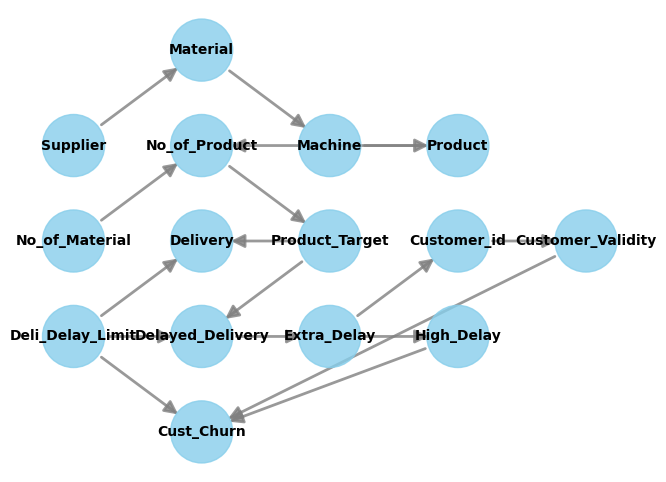

In [14]:
from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='No_of_Product',
        outcome='Cust_Churn')
model.view_model()
#display(Image(filename="dagitty-model.png"))

In [15]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                       
────────────────(E[Cust_Churn])
d[No_of_Product]               
Estimand assumption 1, Unconfoundedness: If U→{No_of_Product} and U→Cust_Churn then P(Cust_Churn|No_of_Product,,U) = P(Cust_Churn|No_of_Product,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                            
 ⎢            d                          ⎛            d                       
E⎢──────────────────────────(Cust_Churn)⋅⎜──────────────────────────([No_of_Pr
 ⎣d[Product  No_of_Material]             ⎝d[Product  No_of_Material]          

        -1⎤
       ⎞  ⎥
oduct])⎟  ⎥
       ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Cust_Churn then ¬(U →→{Product,No_of_Material})
Estimand assumption 2, Exclusion: If we remove {Product,No_of_Material}→{No_of_Product}, then ¬({Product,No_of_Material}→Cust_Churn)

##